# Plotting intracranial electrode locations

Try using MNI coordinates + nilearn

In [1]:
!pip install nilearn

In [2]:
import numpy as np 
from matplotlib import pyplot as plt 
import os
import sys
from nilearn import plotting, datasets

# import utils path
sys.path.append('/home/renee/WM_letters/utils')
import load_data as ld
import importlib

ModuleNotFoundError: No module named 'load_data'

In [ ]:
files = ld.get_data_files()
print(files)

file_name = files[0]
print(file_name)

['Data_Subject_01_Session_01.h5', 'Data_Subject_01_Session_02.h5', 'Data_Subject_01_Session_03.h5', 'Data_Subject_01_Session_04.h5', 'Data_Subject_02_Session_01.h5', 'Data_Subject_02_Session_02.h5', 'Data_Subject_02_Session_03.h5', 'Data_Subject_02_Session_04.h5', 'Data_Subject_02_Session_05.h5', 'Data_Subject_02_Session_06.h5', 'Data_Subject_02_Session_07.h5', 'Data_Subject_03_Session_01.h5', 'Data_Subject_03_Session_02.h5', 'Data_Subject_03_Session_03.h5', 'Data_Subject_04_Session_01.h5', 'Data_Subject_04_Session_02.h5', 'Data_Subject_05_Session_01.h5', 'Data_Subject_05_Session_02.h5', 'Data_Subject_05_Session_03.h5', 'Data_Subject_06_Session_01.h5', 'Data_Subject_06_Session_02.h5', 'Data_Subject_06_Session_03.h5', 'Data_Subject_06_Session_04.h5', 'Data_Subject_06_Session_05.h5', 'Data_Subject_06_Session_06.h5', 'Data_Subject_06_Session_07.h5', 'Data_Subject_07_Session_01.h5', 'Data_Subject_07_Session_02.h5', 'Data_Subject_07_Session_03.h5', 'Data_Subject_07_Session_04.h5', 'Data_Sub

In [ ]:
files = ld.get_data_files()

regions_list = []
for file_name in files:
    # print(file_name)
    _, _, mni_coordinates_labels, _ = ld.get_ieeg_electrodes(file_name)
    unique_regions = np.unique([region[1:-1] for region in mni_coordinates_labels])
    # print(unique_regions)
    regions_list.extend(unique_regions)
regions_list = np.unique(regions_list)
print('all unique regions: ')
print(regions_list)

all unique regions: 
['AHL' 'AHR' 'AL' 'AR' 'DRR' 'ECL' 'ECR' 'LR' 'PHL' 'PHR']


In [ ]:
# LR and DRR are lesions and dysplasias, remove from list

regions_list = regions_list[~np.isin(regions_list, ['LR', 'DRR'])]
print(regions_list)

['AHL' 'AHR' 'AL' 'AR' 'ECL' 'ECR' 'PHL' 'PHR']


In [ ]:
region_keys = [key for key in mni_coordinates_labels if 'AHL' in key]
region_keys

['mAHL1', 'mAHL2', 'mAHL3', 'mAHL4', 'mAHL5', 'mAHL6', 'mAHL7', 'mAHL8']

### Get iEEG data

In [ ]:
importlib.reload(ld)
electrode_map_data, mni_coordinates_data, mni_coordinates_labels, mni_coordinates_units = ld.get_ieeg_electrodes(file_name)

In [ ]:
print(electrode_map_data.shape)
print(mni_coordinates_data.shape)
print(mni_coordinates_labels)
print(mni_coordinates_units)

(64,)
(64, 3)
('mAHL1', 'mAHL2', 'mAHL3', 'mAHL4', 'mAHL5', 'mAHL6', 'mAHL7', 'mAHL8', 'mAHR1', 'mAHR2', 'mAHR3', 'mAHR4', 'mAHR5', 'mAHR6', 'mAHR7', 'mAHR8', 'mAL1', 'mAL2', 'mAL3', 'mAL4', 'mAL5', 'mAL6', 'mAL7', 'mAL8', 'mAR1', 'mAR2', 'mAR3', 'mAR4', 'mAR5', 'mAR6', 'mAR7', 'mAR8', 'mECL1', 'mECL2', 'mECL3', 'mECL4', 'mECL5', 'mECL6', 'mECL7', 'mECL8', 'mECR1', 'mECR2', 'mECR3', 'mECR4', 'mECR5', 'mECR6', 'mECR7', 'mECR8', 'mPHL1', 'mPHL2', 'mPHL3', 'mPHL4', 'mPHL5', 'mPHL6', 'mPHL7', 'mPHL8', 'mPHR1', 'mPHR2', 'mPHR3', 'mPHR4', 'mPHR5', 'mPHR6', 'mPHR7', 'mPHR8')
mm


## adjusting for figs

In [ ]:
from matplotlib.colors import to_hex

print(to_hex(c1))
print(to_hex(c2))
print(to_hex(c3))

#b240ff
#ff7845
#00d9d9


In [ ]:
import numpy as np
import nibabel as nib

# The MNI coordinate you're interested in
mni_coords = (-25, -7, -13)

# Convert MNI coords to voxel indices
voxel_indices = nib.affines.apply_affine(np.linalg.inv(mni_template.affine), mni_coords)

# Convert to integers (round or floor/ceil as appropriate)
voxel_indices = tuple(np.round(voxel_indices).astype(int))

print("Voxel indices:", voxel_indices)

Voxel indices: (73, 127, 59)


In [ ]:
def mni_to_voxel(mni_coords, affine):
    """Convert MNI coordinates to voxel indices using the provided affine matrix."""
    voxel_indices = nib.affines.apply_affine(np.linalg.inv(affine), mni_coords)
    return tuple(np.round(voxel_indices).astype(int))

In [ ]:
data = mni_template.get_fdata()
x_slice = data[voxel_indices[0], :, :]  
y_slice = data[:, voxel_indices[1], :]
z_slice = data[:, :, voxel_indices[2]]

In [ ]:
# coords for z
z_index = voxel_indices[2]
slice_data = data[:, :, z_index]
affine = mni_template.affine

# Get the shape of the slice (X and Y)
nx, ny = slice_data.shape

# Create voxel coordinates for corners of the image (top-left and bottom-right)
voxel_corners = np.array([
    [0, 0, z_index],          # top-left
    [nx, ny, z_index]         # bottom-right
])

# Convert voxel corners to MNI space
mni_corners = nib.affines.apply_affine(affine, voxel_corners)

# Extract extent: (x_min, x_max, y_min, y_max)
# imshow expects: extent = (left, right, bottom, top)
extent_z = [mni_corners[0, 0], mni_corners[1, 0],   # x_min to x_max
            mni_corners[0, 1], mni_corners[1, 1]]   # y_min to y_max

# coords for y
y_index = voxel_indices[1]
slice_data = data[:, y_index, :]
affine = mni_template.affine

# Get the shape of the slice (X and Z)
nx, nz = slice_data.shape

# Create voxel coordinates for corners of the image (top-left and bottom-right)
voxel_corners = np.array([
    [0, y_index, 0],          # top-left
    [nx, y_index, nz]         # bottom-right
])

# Convert voxel corners to MNI space
mni_corners = nib.affines.apply_affine(affine, voxel_corners)

# Extract extent: (x_min, x_max, y_min, y_max)
# imshow expects: extent = (left, right, bottom, top)
extent_y = [mni_corners[0, 0], mni_corners[1, 0],   # x_min to x_max
            mni_corners[0, 2], mni_corners[1, 2]]   # z_min to z_max

# coords for x
x_index = voxel_indices[0]
slice_data = data[x_index, :, :]
affine = mni_template.affine
# Get the shape of the slice (Y and Z)
ny, nz = slice_data.shape
# Create voxel coordinates for corners of the image (top-left and bottom-right)
voxel_corners = np.array([
    [x_index, 0, 0],          # top-left
    [x_index, ny, nz]         # bottom-right
])
# Convert voxel corners to MNI space
mni_corners = nib.affines.apply_affine(affine, voxel_corners)
# Extract extent: (x_min, x_max, y_min, y_max)
# imshow expects: extent = (left, right, bottom, top)
extent_x = [mni_corners[0, 1], mni_corners[1, 1],   # y_min to y_max
            mni_corners[0, 2], mni_corners[1, 2]]   # z_min to z_max

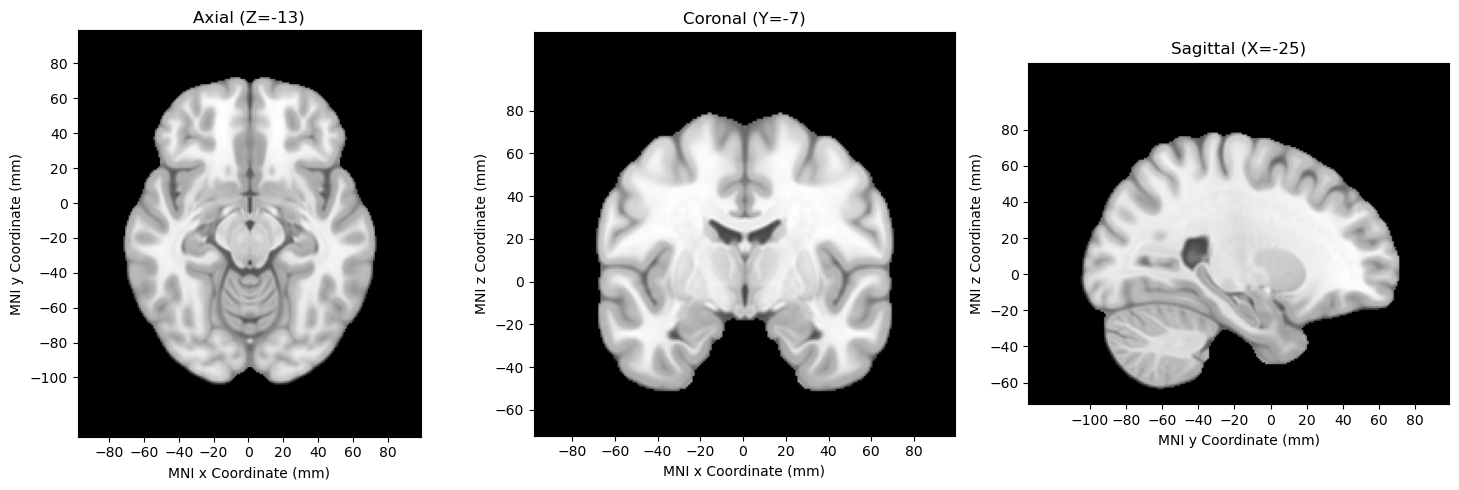

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(np.rot90(z_slice), cmap='gray', extent=extent_z)
axs[0].set_title('Axial (Z=-13)')
axs[0].set_yticks(np.arange(-100, 81, 20))
axs[0].set_xticks(np.arange(-80, 81, 20))
axs[0].set_xlabel('MNI x Coordinate (mm)')
axs[0].set_ylabel('MNI y Coordinate (mm)')

axs[1].imshow(np.rot90(y_slice), cmap='gray', extent=extent_y)
axs[1].set_title('Coronal (Y=-7)')
axs[1].set_xticks(np.arange(-80, 81, 20))
axs[1].set_yticks(np.arange(-60, 81, 20))
axs[1].set_xlabel('MNI x Coordinate (mm)')
axs[1].set_ylabel('MNI z Coordinate (mm)')

axs[2].imshow(np.rot90(x_slice), cmap='gray', extent=extent_x)
axs[2].set_title('Sagittal (X=-25)')
axs[2].set_xticks(np.arange(-100, 81, 20))
axs[2].set_yticks(np.arange(-60, 81, 20))
axs[2].set_xlabel('MNI y Coordinate (mm)')
axs[2].set_ylabel('MNI z Coordinate (mm)')


plt.tight_layout()
plt.show()


In [ ]:
# NEON

# brighter
c1 = [0.7, 0.25, 1] #purple
c2 = [1, 0.47, 0.27] #red
c3 = [0, 0.85, 0.85] #green
size = 15

# the deepest electrode, with non-shown cuts showing through??

files = ld.get_data_files()


import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(np.rot90(z_slice), cmap='gray', extent=extent_z)
axs[0].set_title('Axial (Z=-13)')
axs[0].set_yticks(np.arange(-120, 81, 20))
axs[0].set_xticks(np.arange(-80, 81, 20))
axs[0].set_xlabel('MNI x Coordinate (mm)')
axs[0].set_ylabel('MNI y Coordinate (mm)')

axs[1].imshow(np.rot90(y_slice), cmap='gray', extent=extent_y)
axs[1].set_title('Coronal (Y=-7)')
axs[1].set_xticks(np.arange(-80, 81, 20))
axs[1].set_yticks(np.arange(-60, 101, 20))
axs[1].set_xlabel('MNI x Coordinate (mm)')
axs[1].set_ylabel('MNI z Coordinate (mm)')

axs[2].imshow(np.rot90(x_slice), cmap='gray', extent=extent_x)
axs[2].set_title('Sagittal (X=-25)')
axs[2].set_xticks(np.arange(-120, 81, 20))
axs[2].set_yticks(np.arange(-60, 101, 20))
axs[2].set_xlabel('MNI y Coordinate (mm)')
axs[2].set_ylabel('MNI z Coordinate (mm)')


# for x
for file_name in files:
    _, mni_coordinates_data, mni_coordinates_labels, _ = ld.get_ieeg_electrodes(file_name)
    # mni_coordinates_data[:,0] = -25
    locs, loc_idx = np.unique([loc[1:-1] for loc in mni_coordinates_labels], return_index=True)

    for i, loc in enumerate(locs):
        mni_coords = mni_coordinates_data[loc_idx[i],:]
        mni_idxs = mni_to_voxel(mni_coords, mni_template.affine)
        if loc in ["AHR","AHL", "PHR", "PHL"]:
            axs[2].scatter(mni_coords[1], mni_coords[2], color=c1, s=size/3)
            axs[0].scatter(mni_coords[0], mni_coords[1], color=c1, s=size/3)
            axs[1].scatter(mni_coords[0], mni_coords[2], color=c1, s=size/3)
        elif loc in ["AL","AR"]:
            axs[2].scatter(mni_coords[1], mni_coords[2], color=c2, s=size/3)
            axs[0].scatter(mni_coords[0], mni_coords[1], color=c2, s=size/3)
            axs[1].scatter(mni_coords[0], mni_coords[2], color=c2, s=size/3)
        elif loc in ["ECL","ECR"]:
            axs[2].scatter(mni_coords[1], mni_coords[2], color=c3, s=size/3)
            axs[0].scatter(mni_coords[0], mni_coords[1], color=c3, s=size/3)
            axs[1].scatter(mni_coords[0], mni_coords[2], color=c3, s=size/3)

plt.tight_layout()

plt.savefig('fig2b.eps')

plt.show()

NameError: name 'ld' is not defined

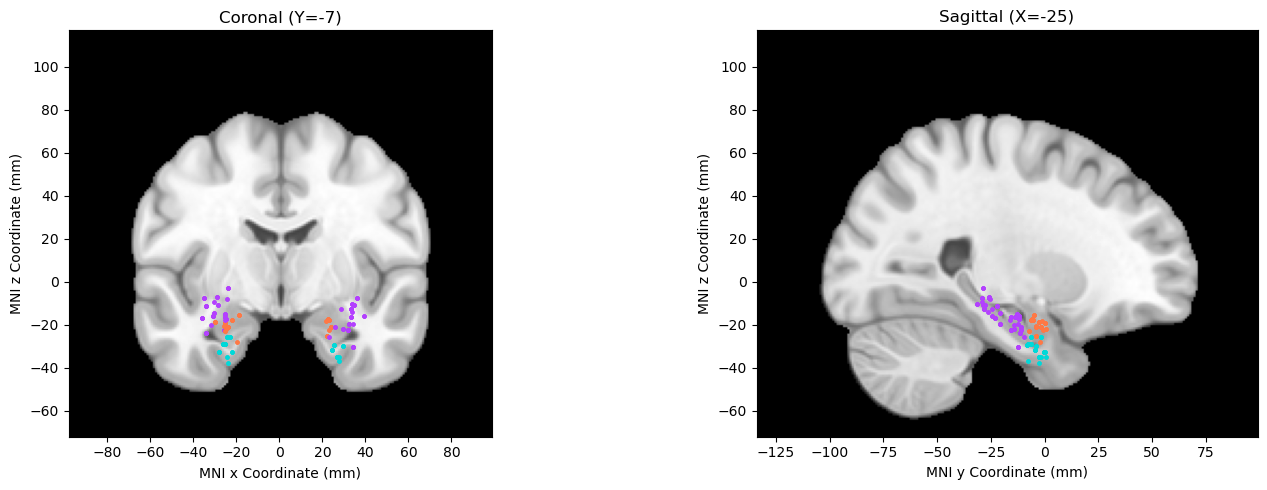

In [ ]:
# Just sagital and coronal

# brighter
c1 = [0.7, 0.25, 1] #purple
c2 = [1, 0.47, 0.27] #red
c3 = [0, 0.85, 0.85] #green
size = 15

# the deepest electrode, with non-shown cuts showing through??

files = ld.get_data_files()


import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)


axs[0].imshow(np.rot90(y_slice), cmap='gray', extent=extent_y)
axs[0].set_title('Coronal (Y=-7)')
axs[0].set_xticks(np.arange(-80, 81, 20))
axs[0].set_yticks(np.arange(-60, 101, 20))
axs[0].set_xlabel('MNI x Coordinate (mm)')
axs[0].set_ylabel('MNI z Coordinate (mm)')

axs[1].imshow(np.rot90(x_slice), cmap='gray', extent=extent_x)
axs[1].set_title('Sagittal (X=-25)')
axs[1].set_xticks(np.arange(-125, 101, 25))
axs[1].set_yticks(np.arange(-60, 101, 20))
axs[1].set_xlabel('MNI y Coordinate (mm)')
axs[1].set_ylabel('MNI z Coordinate (mm)')
axs[1].tick_params(labelleft=True)  # Force left-side tick labels


# for x
for file_name in files:
    _, mni_coordinates_data, mni_coordinates_labels, _ = ld.get_ieeg_electrodes(file_name)
    # mni_coordinates_data[:,0] = -25
    locs, loc_idx = np.unique([loc[1:-1] for loc in mni_coordinates_labels], return_index=True)

    for i, loc in enumerate(locs):
        mni_coords = mni_coordinates_data[loc_idx[i],:]
        mni_idxs = mni_to_voxel(mni_coords, mni_template.affine)
        if loc in ["AHR","AHL", "PHR", "PHL"]:
            axs[1].scatter(mni_coords[1], mni_coords[2], color=c1, s=size/3)
            # axs[0].scatter(mni_coords[0], mni_coords[1], color=c1, s=size/3)
            axs[0].scatter(mni_coords[0], mni_coords[2], color=c1, s=size/3)
        elif loc in ["AL","AR"]:
            axs[1].scatter(mni_coords[1], mni_coords[2], color=c2, s=size/3)
            # axs[0].scatter(mni_coords[0], mni_coords[1], color=c2, s=size/3)
            axs[0].scatter(mni_coords[0], mni_coords[2], color=c2, s=size/3)
        elif loc in ["ECL","ECR"]:
            axs[1].scatter(mni_coords[1], mni_coords[2], color=c3, s=size/3)
            # axs[0].scatter(mni_coords[0], mni_coords[1], color=c3, s=size/3)
            axs[0].scatter(mni_coords[0], mni_coords[2], color=c3, s=size/3)

plt.tight_layout()

plt.savefig('iEEG_xy.eps')

plt.show()

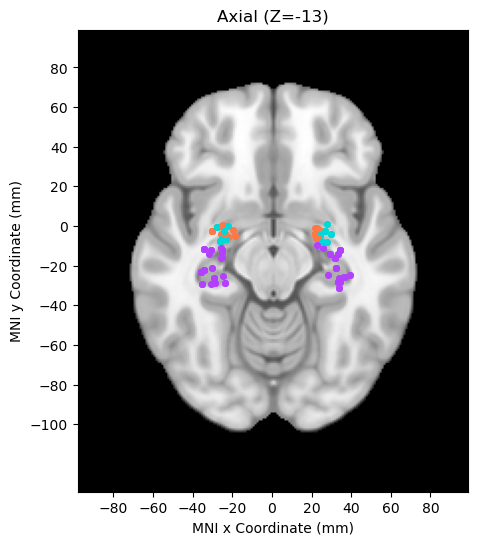

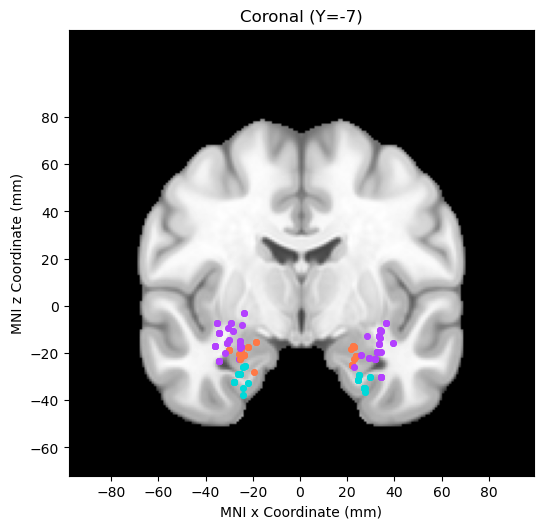

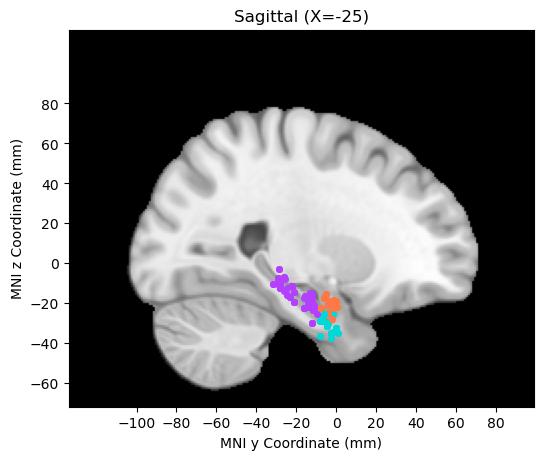

In [ ]:
# plot each one separately as a different fig

for i, ax in enumerate(axs):
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))

    if i == 0:
        ax.imshow(np.rot90(z_slice), cmap='gray', extent=extent_z)
        ax.set_title('Axial (Z=-13)')
        ax.set_yticks(np.arange(-100, 81, 20))
        ax.set_xticks(np.arange(-80, 81, 20))
        ax.set_xlabel('MNI x Coordinate (mm)')
        ax.set_ylabel('MNI y Coordinate (mm)')
    elif i == 1:
        ax.imshow(np.rot90(y_slice), cmap='gray', extent=extent_y)
        ax.set_title('Coronal (Y=-7)')
        ax.set_xticks(np.arange(-80, 81, 20))
        ax.set_yticks(np.arange(-60, 81, 20))
        ax.set_xlabel('MNI x Coordinate (mm)')
        ax.set_ylabel('MNI z Coordinate (mm)')
    else:
        ax.imshow(np.rot90(x_slice), cmap='gray', extent=extent_x)
        ax.set_title('Sagittal (X=-25)')
        ax.set_xticks(np.arange(-100, 81, 20))
        ax.set_yticks(np.arange(-60, 81, 20))
        ax.set_xlabel('MNI y Coordinate (mm)')
        ax.set_ylabel('MNI z Coordinate (mm)')

    # for x
    for file_name in files:
        _, mni_coordinates_data, mni_coordinates_labels, _ = ld.get_ieeg_electrodes(file_name)
        # mni_coordinates_data[:,0] = -25
        locs, loc_idx = np.unique([loc[1:-1] for loc in mni_coordinates_labels], return_index=True)

        for j, loc in enumerate(locs):
            mni_coords = mni_coordinates_data[loc_idx[j],:]
            mni_idxs = mni_to_voxel(mni_coords, mni_template.affine)
            if loc in ["AHR","AHL", "PHR", "PHL"]:
                if i == 0:
                    ax.scatter(mni_coords[0], mni_coords[1], color=c1, s=size)
                elif i == 1:
                    ax.scatter(mni_coords[0], mni_coords[2], color=c1, s=size)
                else:
                    ax.scatter(mni_coords[1], mni_coords[2], color=c1, s=size)
            elif loc in ["AL","AR"]:
                if i == 0:
                    ax.scatter(mni_coords[0], mni_coords[1], color=c2, s=size)
                elif i == 1:
                    ax.scatter(mni_coords[0], mni_coords[2], color=c2, s=size)
                else:
                    ax.scatter(mni_coords[1], mni_coords[2], color=c2, s=size)
            elif loc in ["ECL","ECR"]:
                if i == 0:
                    ax.scatter(mni_coords[0], mni_coords[1], color=c3, s=size)
                elif i == 1:
                    ax.scatter(mni_coords[0], mni_coords[2], color=c3, s=size)
                else:
                    ax.scatter(mni_coords[1], mni_coords[2], color=c3, s=size)
    # plt.tight_layout()
    plt.savefig(f'iEEG_{"zyx"[i]}.eps')
    plt.show()
